This notebook uses `sktime`


Examples of classification; try just training a CNN versus Random Weights versus raw time series?
+ Justification: TimeNet paper suggests generic feature extractors exist


https://github.com/hfawaz/dl-4-tsc/tree/master/classifiers
https://pyts.readthedocs.io/en/stable/generated/pyts.datasets.load_basic_motions.html

In [16]:
import sys

import matplotlib.pyplot as plt
import json

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *


# try:
#     from private.lyap import lyap_r, lyap_e, corr_dim
# except:
#     from nolds import lyap_r, lyap_e, corr_dim

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
%%bash

python3 surrogate_transfer_learning.py

In [17]:
# ?sktime.datasets.load_UCR_UEA_dataset

In [6]:
## Pre-processing: nothing, PCA, rockets, trained rockets


## Featurize: tsfresh, random convolutions, pre-trained AE
## try selecting chaotic systems with the closest power spectrum
from sktime.transformations.panel.rocket import Rocket
model = Rocket() 

In [10]:
import torch
from torch import nn

## Benchmarks: 
# tsfresh handcrafted features
# ROCKET: Random convolutional transforms followed by an aggregation operation
# What classifier to use? Just a random forest?

https://github.com/White-Link/UnsupervisedScalableRepresentationLearningTimeSeries/tree/master/networks

In [242]:
# chunk_size = 30


    

    
from dysts.flows import Lorenz

model = Lorenz()

sol = model.make_trajectory(1000, resample=True)

model = Autoencoder()
print(inputs.shape)
print(model.encoder(inputs).shape)
print(model(inputs).shape)

torch.Size([4, 1, 100])
torch.Size([4, 8, 34])
torch.Size([4, 1, 100])


In [236]:
sol.shape

(1000,)

In [233]:
np.unravel_index(90, (7,  (100 - 10)))

(1, 0)

In [226]:
np.ravel_multi_index(0, (7,  (100 - 10)))

TypeError: dispatcher for __array_function__ did not return an iterable

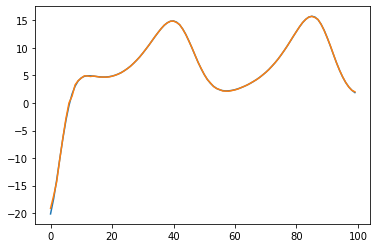

In [243]:


    
# training_data = UnivariateTimeSeries(sol[:, 0], 100)
training_data = TimeSeriesCollection(sol, 100)






model = Autoencoder()
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, outputs = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(inputs, outputs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
plt.plot(inputs[0, 0, :].detach().numpy())
plt.plot(outputs[0, 0, :].detach().numpy())

In [ ]:
## Batchwise training classifier
## Baseline is usually 1-NN with DTW
## But really need an NN where we can pre-train
## ROCKET vs trained convolutional?



## Or, unsupervised learning on a bunch of chaotic ssytems
## then train a classifier on the encoder outputs for new data

Classifier: logistic regression and Adam OR Ridge Regression



In [304]:
import sktime.datasets
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sklearn.linear_model import RidgeClassifierCV

cwd = os.getcwd()
# cwd = os.path.dirname(os.path.realpath(__file__))
output_path = cwd + "/results/transfer_learning.json"
print("Saving data to: ", output_path)

dataset_names = np.genfromtxt("./resources/ucr_ea_names.txt", dtype='str')

all_scores = dict()
for name in dataset_names:
    all_scores[name] = dict()
    X_train, y_train = sktime.datasets.load_UCR_UEA_dataset(name, split="train", return_X_y=True)
    X_test, y_test = sktime.datasets.load_UCR_UEA_dataset(name, split="test", return_X_y=True)
    
    transformer = TSFreshFeatureExtractor()
    X_train_featurized = transformer.fit_transform(X_train)
    X_test_featurized = transformer.fit_transform(X_test)

    model = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10), normalize = True)
    model.fit(X_train_featurized, y_train)

    score = model.score(X_test_featurized, y_test)
    all_scores[name]["score_tsfresh"] = model.score(X_test_featurized, y_test)

    print(name, score, flush=True)
    
    with open(output_path, 'w') as file:
        json.dump(all_scores, file, indent=4)
    

Saving data to:  /Users/williamgilpin/program_repos/dysts/benchmarks/results/transfer_learning.json


Feature Extraction: 100%|██████████| 5/5 [00:23<00:00,  4.72s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:25<00:00,  5.12s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


ACSF1 0.77


Feature Extraction: 100%|██████████| 5/5 [00:25<00:00,  5.16s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__fft_coefficient__attr_"real"__coeff_89'
 'dim_0__fft_coefficient__attr_"real"__coeff_90'
 'dim_0__fft_coefficient__attr_"real"__coeff_91'
 'dim_0__fft_coefficient__attr_"real"__coeff_92'
 'dim_0__fft_coefficient__attr_"real"__coeff_93'
 'dim_0__fft_coefficient__attr_"real"__coeff_94'
 'dim_0__fft_coefficient__attr_"real"__coeff_95'
 'dim_0__fft_coefficient__attr_"real"__coeff_96'
 'dim_0__fft_coefficient__attr_"real"__coeff_97'
 'dim_0__fft_coefficient__attr_"real"__coeff_98'
 'dim_0__fft_coefficient__attr_"real"__coeff_99'
 'dim_0__fft_coefficient__attr_"imag"__coeff_89'
 'dim_0__fft_coefficient__attr_"imag"__coeff_90'
 'dim_0__fft_coefficient__attr_"imag"__coeff_91'
 'dim_0__fft_coefficient__attr_"imag"__coeff_92'
 'dim_0__fft_coefficient__attr_"imag"__coeff_93'
 'dim

Adiac 0.5549872122762148


Feature Extraction: 100%|██████████| 5/5 [00:16<00:00,  3.21s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:34<00:00,  6.91s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


AllGestureWiimoteX 0.6285714285714286


Feature Extraction: 100%|██████████| 5/5 [00:18<00:00,  3.63s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:37<00:00,  7.56s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


AllGestureWiimoteY 0.6542857142857142


Feature Extraction: 100%|██████████| 5/5 [00:17<00:00,  3.40s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:37<00:00,  7.50s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


AllGestureWiimoteZ 0.5157142857142857


Feature Extraction: 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:16<00:00,  3.30s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


ArrowHead 0.6857142857142857


Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__fft_coefficient__attr_"real"__coeff_65'
 'dim_0__fft_coefficient__attr_"real"__coeff_66'
 'dim_0__fft_coefficient__attr_"real"__coeff_67'
 'dim_0__fft_coefficient__attr_"real"__coeff_68'
 'dim_0__fft_coefficient__attr_"real"__coeff_69'
 'dim_0__fft_coefficient__attr_"real"__coeff_70'
 'dim_0__fft_coefficient__attr_"real"__coeff_71'
 'dim_0__fft_coefficient__attr_"real"__coeff_72'
 'dim_0__fft_coefficient__attr_"real"__coeff_73'
 'dim_0__fft_coefficient__attr_"real"__coeff_74'
 'dim_0__fft_coefficient__attr_"real"__coeff_75'
 'dim_0__fft_coefficient__attr_"real"__coeff_76'
 'dim_0__fft_coefficient__attr_"real"__coeff_77'
 'dim_0__fft_coefficient__attr_"real"__coeff_78'
 'dim_0__fft_coefficient__attr_"real"__coeff_79'
 'dim_0__fft_coefficient__attr_"real"__coeff_80'
 'dim

BME 1.0


Feature Extraction: 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

Beef 0.8666666666666667



/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

BeetleFly 0.8



/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

BirdChicken 0.85



/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__fft_coefficient__attr_"real"__coeff_65'
 'dim_0__fft_coefficient__attr_"real"__coeff_66'
 'dim_0__fft_coefficient__attr_"real"__coeff_67'
 'dim_0__fft_coefficient__attr_"real"__coeff_68'
 'dim_0__fft_coefficient__attr_"real"__coeff_69'
 'dim_0__fft_coefficient__attr_"real"__coeff_70'
 'dim_0__fft_coefficient__attr_"real"__coeff_71'
 'dim_0__fft_coefficient__attr_"real"__coeff_72'
 'dim_0__fft_coefficient__attr_"real"__coeff_

CBF 0.9933333333333333


Feature Extraction: 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]

Car 0.7166666666666667



/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__fft_coefficient__attr_"real"__coeff_13'
 'dim_0__fft_coefficient__attr_"real"__coeff_14'
 'dim_0__fft_coefficient__attr_"real"__coeff_15'
 'dim_0__fft_coefficient__attr_"real"__coeff_16'
 'dim_0__fft_coefficient__attr_"real"__coeff_17'
 'dim_0__fft_coefficient__attr_"real"__coeff_18'
 'dim_0__fft_coefficient__attr_"real"__coeff_19'
 'dim_0__fft_coefficient__attr_"real"__coeff_20'
 'dim_0__fft_coefficient__attr_"real"__coeff_

Chinatown 0.9737609329446064


Feature Extraction: 100%|██████████| 5/5 [00:35<00:00,  7.04s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__fft_coefficient__attr_"real"__coeff_84'
 'dim_0__fft_coefficient__attr_"real"__coeff_85'
 'dim_0__fft_coefficient__attr_"real"__coeff_86'
 'dim_0__fft_coefficient__attr_"real"__coeff_87'
 'dim_0__fft_coefficient__attr_"real"__coeff_88'
 'dim_0__fft_coefficient__attr_"real"__coeff_89'
 'dim_0__fft_coefficient__attr_"real"__coeff_90'
 'dim_0__fft_coefficient__attr_"real"__coeff_91'
 'dim_0__fft_coefficient__attr_"real"__coeff_92'
 'dim_0__fft_coefficient__attr_"real"__coeff_93'
 'dim_0__fft_coefficient__attr_"real"__coeff_94'
 'dim_0__fft_coefficient__attr_"real"__coeff_95'
 'dim_0__fft_coefficient__attr_"real"__coeff_96'
 'dim_0__fft_coefficient__attr_"real"__coeff_97'
 'dim_0__fft_coefficient__attr_"real"__coeff_98'
 'dim_0__fft_coefficient__attr_"real"__coeff_99'
 'dim

ChlorineConcentration 0.6135416666666667


Feature Extraction: 100%|██████████| 5/5 [00:11<00:00,  2.29s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [05:46<00:00, 69.28s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


CinCECGTorso 0.8021739130434783


Feature Extraction: 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

Coffee 1.0



/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [00:26<00:00,  5.40s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__friedrich_coefficients__coeff_0__m_3__r_30'
 'dim_0__friedrich_coefficients__coeff_1__m_3__r_30'
 'dim_0__friedrich_coefficients__coeff_2__m_3__r_30'
 'dim_0__friedrich_coefficients__coeff_3__m_3__r_30'
 'dim_0__max_langevin_fixed_point__m_3__r_30'
 'dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Fi

Computers 0.716


Feature Extraction: 100%|██████████| 5/5 [00:40<00:00,  8.15s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['dim_0__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction:  40%|████      | 2/5 [00:21<00:31, 10.65s/it]


KeyboardInterrupt: 

In [248]:
from dysts.utils import find_significant_frequencies

from sktime.utils.data_processing import from_nested_to_3d_numpy, from_3d_numpy_to_nested

X_train_np = from_nested_to_3d_numpy(X_train)
X_test_np = from_nested_to_3d_numpy(X_test)

all_freqs = list()
for row in X_train_np:
    freqs, amps = find_significant_frequencies(row[0], return_amplitudes=True)
    sort_inds = np.argsort(amps)[::-1]
    freqs, amps = freqs[sort_inds], amps[sort_inds]
    all_freqs.append(freqs[0])
main_freq = np.median(all_freqs)
main_period = 2 * 1/main_freq

all_sols = list()
for equation_ind, equation_name in enumerate(get_attractor_list()):
    equation = getattr(dysts.flows, equation_name)()
    sol = equation.make_trajectory(1000, resample=True, pts_per_period=int(main_period))
    all_sols.append(standardize_ts(sol)[:, 0])
    if equation_ind > 5:
        print("stopped at index")
        break
all_sols = np.array(all_sols).T
# plt.plot(all_sols[:100]);

# plt.plot(row[0][:300])
# plt.plot(sol[:300, 0]/5)




/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/miniconda3/envs/dys

stopped at index


In [255]:
training_data = TimeSeriesCollection(all_sols, 100)

model = Autoencoder()
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, outputs = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(inputs, outputs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

In [298]:
X_train_nn = from_3d_numpy_to_nested(model.encoder(torch.tensor(X_train_np, dtype=torch.float32)).detach().numpy())
X_test_nn = from_3d_numpy_to_nested(model.encoder(torch.tensor(X_test_np, dtype=torch.float32)).detach().numpy())

transformer = TSFreshFeatureExtractor()
X_train_featurized = transformer.fit_transform(X_train_nn)
X_test_featurized = transformer.fit_transform(X_test_nn)

model = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10), normalize = True)
model.fit(X_train_featurized, y_train)

score = model.score(X_test_featurized, y_test)

Feature Extraction: 100%|██████████| 5/5 [02:55<00:00, 35.04s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['var_0__fft_coefficient__attr_"real"__coeff_51'
 'var_0__fft_coefficient__attr_"real"__coeff_52'
 'var_0__fft_coefficient__attr_"real"__coeff_53' ...
 'var_7__fft_coefficient__attr_"angle"__coeff_98'
 'var_7__fft_coefficient__attr_"angle"__coeff_99'
 'var_7__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(
Feature Extraction: 100%|██████████| 5/5 [02:47<00:00, 33.41s/it]
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['var_0__fft_coefficient__attr_"real"__coeff_51'
 'var_0__fft_coefficient__attr_"real"__coeff_52'
 'var_0__fft_coefficien

In [12]:
train_dataloader = TimeSeriesCollection(all_sols, 100)

In [7]:
TimeSeriesCollection(all_sols, 100)

In [15]:
    training_data = TimeSeriesCollection(all_sols, 100)
    model = Autoencoder()
    train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

In [20]:
batch_inds

array([5664, 3591, 1243, ..., 2074, 4443, 3557])

In [16]:
len(train_dataloader)

99

In [25]:
[len(item) for item in all_sols]

[1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 0,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000]

In [135]:
np.mean(X_train_np[0, 0])

-5.003822082817607e-17

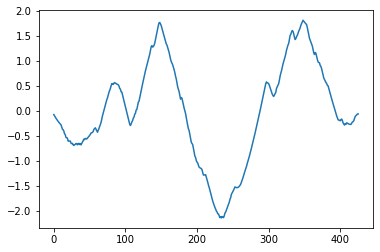

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train_np[0, 0])

In [123]:
np.mean(standardize_ts(np.squeeze(X_train_np).T).T, axis=-1)

array([-1.66794069e-17,  1.33435256e-16, -1.66794069e-17, -3.33588139e-17,
        6.67176278e-17,  1.66794069e-17,  0.00000000e+00,  0.00000000e+00,
       -4.16985174e-17,  5.00382208e-17, -1.66794069e-17, -8.33970347e-17,
       -4.16985174e-17,  1.66794069e-17, -7.50573312e-17,  0.00000000e+00,
       -1.66794069e-17,  0.00000000e+00,  3.33588139e-17, -1.66794069e-17,
        8.33970347e-18,  0.00000000e+00, -3.33588139e-17,  6.67176278e-17,
        3.75286656e-17, -3.33588139e-17,  0.00000000e+00, -6.67176278e-17,
        2.50191104e-17,  5.00382208e-17,  5.00382208e-17,  1.66794069e-17,
       -1.66794069e-17, -1.25095552e-17,  3.33588139e-17,  6.67176278e-17,
       -5.83779243e-17, -6.67176278e-17,  3.33588139e-17,  1.66794069e-17,
        3.33588139e-17,  0.00000000e+00, -1.66794069e-17,  3.33588139e-17,
        1.66794069e-17, -1.66794069e-17,  0.00000000e+00,  0.00000000e+00,
       -3.33588139e-17,  5.00382208e-17, -1.00076442e-16,  4.16985174e-17,
       -3.33588139e-17,  

In [113]:
X_train_np.shape

(300, 1, 426)

In [110]:
    X_train, y_train = sktime.datasets.load_UCR_UEA_dataset(name, split="train", return_X_y=True)
    X_test, y_test = sktime.datasets.load_UCR_UEA_dataset(name, split="test", return_X_y=True)
    
    X_train_np = from_nested_to_3d_numpy(X_train)
    X_test_np = from_nested_to_3d_numpy(X_test)

In [ ]:
torch.utils.data.Subset

In [38]:
len(np.array([]))

0

In [36]:
PiecewiseCircuit().make_trajectory(10000, resample=True, pts_per_period=1 + int(main_period))

array([], shape=(0, 10), dtype=float64)

In [4]:
all_freqs

[]

In [18]:
len(X_train_np[0][0])

24

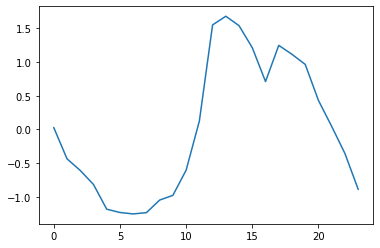

In [17]:
plt.plot(X_train_np[0][0])

In [13]:
    for row in X_train_np:
        freqs, amps = find_significant_frequencies(row[0], return_amplitudes=True)
        sort_inds = np.argsort(amps)[::-1]
        freqs, amps = freqs[sort_inds], amps[sort_inds]
        print(freqs)
#         try:
#             all_freqs.append(freqs[0])
#         except IndexError: pass

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [11]:
import os
import json
import numpy as np

import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, Subset
from torch.utils.data.sampler import SubsetRandomSampler


import dysts
from dysts.utils import find_significant_frequencies
from dysts.flows import *
from dysts.base import *

from resources.classification_models import Autoencoder, TimeSeriesCollection

import sktime.datasets
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sklearn.linear_model import RidgeClassifierCV
from sktime.utils.data_processing import from_nested_to_3d_numpy, from_3d_numpy_to_nested

all_scores = dict()
np.random.seed(0)
attractor_list = get_attractor_list()

SEQUENCE_LENGTH = 100
BATCH_SUBSAMPLE = 5000
attractor_list = np.random.choice(attractor_list, 40)

cwd = os.getcwd()
# cwd = os.path.dirname(os.path.realpath(__file__))
output_path = cwd + "/results/transfer_learning.json"
print("Saving data to: ", output_path)

dataset_names = np.genfromtxt("./resources/ucr_ea_names.txt", dtype='str')

try:
    with open(output_path, "r") as file:
        all_scores = json.load(file)
except FileNotFoundError:
    all_scores = dict()

for name in dataset_names:
    
    if name in all_scores.keys():
        if "score_transfer" in all_scores[name].keys():
            print("Skipped " + name, flush=True)
            continue
    print("Evaluating " + name, flush=True)
    
    all_scores[name] = dict()
    X_train, y_train = sktime.datasets.load_UCR_UEA_dataset(name, split="train", return_X_y=True)
    X_test, y_test = sktime.datasets.load_UCR_UEA_dataset(name, split="test", return_X_y=True)
    
    X_train_np = from_nested_to_3d_numpy(X_train)
    X_test_np = from_nested_to_3d_numpy(X_test)
    
    X_train_np -= np.mean(X_train_np, axis=-1, keepdims=True)
    X_train_np /= np.std(X_train_np, axis=-1, keepdims=True)
    X_test_np -= np.mean(X_test_np, axis=-1, keepdims=True)
    X_test_np /= np.std(X_test_np, axis=-1, keepdims=True)
    
    ## Find dominant frequency
    all_freqs = list()
    for row in X_train_np:
        freqs, amps = find_significant_frequencies(row[0], return_amplitudes=True)
        sort_inds = np.argsort(amps)[::-1]
        freqs, amps = freqs[sort_inds], amps[sort_inds]
        try:
            all_freqs.append(freqs[0])
        except IndexError: pass
    main_freq = np.median(all_freqs)
    main_period = 2 * 1/main_freq
    print("Finished finding dominant frequency.", flush=True)
    
    ## Create trajectory ensemble at that random frequency
    all_sols = list()
    for equation_ind, equation_name in enumerate(attractor_list):
        equation = getattr(dysts.flows, equation_name)()
        sol = equation.make_trajectory(1000, resample=True, pts_per_period=int(main_period))
        if len(sol) < 10: # skip undersampled trajectories
            continue
        all_sols.append(standardize_ts(sol)[:, 0])
#         if equation_ind > 5:
#             print("stopped at index " + str(equation_ind))
#             break
    all_sols = np.array(all_sols).T
    print("Finished computing surrogate ensemble.", flush=True)
    
    ## Train model on ensemble
    model = Autoencoder()
    training_data = TimeSeriesCollection(all_sols, SEQUENCE_LENGTH)
    subset_indices = np.random.choice(np.arange(0, len(training_data)), BATCH_SUBSAMPLE, replace=False) # subsample all traj
    train_dataloader = DataLoader(Subset(training_data, subset_indices), batch_size=64, shuffle=True)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    for epoch in range(200):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_dataloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, outputs = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(inputs, outputs)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
    print("Finished training autoencoder.", flush=True)
    
    
    X_train_nn = from_3d_numpy_to_nested(model.encoder(torch.tensor(X_train_np, dtype=torch.float32)).detach().numpy())
    X_test_nn = from_3d_numpy_to_nested(model.encoder(torch.tensor(X_test_np, dtype=torch.float32)).detach().numpy())

    transformer = TSFreshFeatureExtractor(show_warnings=False)
    X_train_featurized = transformer.fit_transform(X_train_nn)
    X_test_featurized = transformer.fit_transform(X_test_nn)

    model = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10), normalize = True)
    model.fit(X_train_featurized, y_train)

    score = model.score(X_test_featurized, y_test)
    
    all_scores[name]["score_transfer"] = model.score(X_test_featurized, y_test)
    
    print(name, score, flush=True)
    
#     with open(output_path, 'w') as file:
#         json.dump(all_scores, file, indent=4)
    
    



Saving data to:  /Users/williamgilpin/program_repos/dysts/benchmarks/results/transfer_learning.json
Evaluating Chinatown
Finished finding dominant frequency.


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot convert float NaN to integer

In [12]:
all_sols

[]

In [23]:

dataset_names = np.genfromtxt("./resources/ucr_ea_names.txt", dtype='str')
for name in dataset_names:
#     print(name, flush=True)
    X_train, y_train = sktime.datasets.load_UCR_UEA_dataset(name, split="train", return_X_y=True)
    all_lengths = np.array([len(np.array(item[0])) for item in X_train.values])
    if np.any(all_lengths != all_lengths[0]):
        print(name, " x ", flush=True)
    else:
        if all_lengths[0] >= 105:
            print(name)

ACSF1
Adiac
ArrowHead
BME
Beef
BeetleFly
BirdChicken
CBF
Car
ChlorineConcentration
CinCECGTorso
Coffee
Computers
CricketX
CricketY
CricketZ
DiatomSizeReduction
DodgerLoopDay
DodgerLoopGame
DodgerLoopWeekend
ECG5000
ECGFiveDays
EOGHorizontalSignal
EOGVerticalSignal
Earthquakes
EthanolLevel
FaceAll
FaceFour
FacesUCR
FiftyWords
Fish
FordA


KeyboardInterrupt: 

In [106]:
len(all_datasets)

NameError: name 'all_datasets' is not defined

In [97]:
all_lengths

array([1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250,
       1250, 1250, 1250, 1250, 1250, 1250, 1250, 12

In [5]:
SubsetRandomSampler

In [4]:
    X_train_nn = from_3d_numpy_to_nested(model.encoder(torch.tensor(X_train_np, dtype=torch.float32)).detach().numpy())
    X_test_nn = from_3d_numpy_to_nested(model.encoder(torch.tensor(X_test_np, dtype=torch.float32)).detach().numpy())

    transformer = TSFreshFeatureExtractor(show_warnings=False)
    X_train_featurized = transformer.fit_transform(X_train_nn)
    X_test_featurized = transformer.fit_transform(X_test_nn)

    model = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10), normalize = True)
    model.fit(X_train_featurized, y_train)

    score = model.score(X_test_featurized, y_test)
    
    all_scores[name]["score_transfer"] = model.score(X_test_featurized, y_test)
    
    print(name, score, flush=True)

Feature Extraction: 100%|██████████| 5/5 [01:20<00:00, 16.04s/it]


ACSF1 0.72


In [9]:
?TSFreshFeatureExtractor

Init signature:
TSFreshFeatureExtractor(
    default_fc_parameters='efficient',
    kind_to_fc_parameters=None,
    chunksize=None,
    n_jobs=1,
    show_warnings=True,
    disable_progressbar=False,
    impute_function=None,
    profiling=None,
    profiling_filename=None,
    profiling_sorting=None,
    distributor=None,
)
Docstring:     
Transformer for extracting time series features

References
----------
..[1]  https://github.com/blue-yonder/tsfresh
File:           ~/miniconda3/envs/dysts/lib/python3.8/site-packages/sktime/transformations/panel/tsfresh.py
Type:           type
Subclasses:     


In [254]:
all_sols.shape

(1000, 7)

In [203]:
sol.shape

(1000, 3)

In [181]:
main_freq

0.5

/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


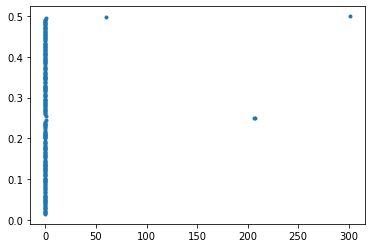

In [173]:
plt.plot(freqs, amps,  '.')

In [48]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

X_train, y_train = load_basic_motions(split="train", return_X_y=True)
X_test, y_test = load_basic_motions(split="test", return_X_y=True)

X_train, y_train = sktime.datasets.load_UCR_UEA_dataset("AbnormalHeartbeat", split="train", return_X_y=True)
X_test, y_test = sktime.datasets.load_UCR_UEA_dataset("AbnormalHeartbeat", split="test", return_X_y=True)

transformer = TSFreshFeatureExtractor()
X_train_featurized = transformer.fit_transform(X_train)
X_test_featurized = transformer.fit_transform(X_test)


from sklearn.linear_model import RidgeClassifierCV

model = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10), normalize = True)
model.fit(X_train_featurized, y_train)

model.score(X_test_featurized, y_test)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/sktime/datasets/data/AbnormalHeartbeat/AbnormalHeartbeat_TRAIN.ts'

In [38]:
X_train_featurized = extracted_features

1.0

In [44]:
model.predict(X_test_featurized)

array(['standing', 'standing', 'standing', 'standing', 'standing',
       'standing', 'standing', 'standing', 'standing', 'standing',
       'running', 'running', 'running', 'running', 'running', 'running',
       'running', 'running', 'running', 'running', 'walking', 'walking',
       'walking', 'walking', 'walking', 'walking', 'walking', 'walking',
       'walking', 'walking', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton'], dtype='<U9')

In [45]:
y_test

array(['standing', 'standing', 'standing', 'standing', 'standing',
       'standing', 'standing', 'standing', 'standing', 'standing',
       'running', 'running', 'running', 'running', 'running', 'running',
       'running', 'running', 'running', 'running', 'walking', 'walking',
       'walking', 'walking', 'walking', 'walking', 'walking', 'walking',
       'walking', 'walking', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton'], dtype='<U9')

## Archive

In [ ]:
from sktime.utils.data_io import load_from_tsfile_to_dataframe


BASE_PATH = "./resources/ucr_univariate_ts"
dataset_names = np.genfromtxt("./resources/ucr_ea_names.txt", dtype='str')

for name in dataset_names:

    X_train, y_train = load_from_tsfile_to_dataframe(
        os.path.join(BASE_PATH, name + "/" + name + "_TRAIN.ts")
    )
    
    X_test, y_test = load_from_tsfile_to_dataframe(
        os.path.join(BASE_PATH, name + "/" + name + "_TEST.ts")
    )

    break


In [ ]:
## use basic motions dataset
from sktime.datasets import load_basic_motions
from sktime.utils.data_processing import from_nested_to_2d_array

X_train = np.array([np.array(item[0]) for item in load_basic_motions(split="train")[["dim_0"]].values])
X_train = standardize_ts(X_train)
y_train = load_basic_motions(split="train")["class_val"].to_list()

X_test = np.array([np.array(item[0]) for item in load_basic_motions(split="test")[["dim_0"]].values])
X_test = standardize_ts(X_test)
y_test = load_basic_motions(split="test")["class_val"].to_list()